In [139]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import shapiro

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot, add_constant
from statsmodels.formula.api import ols

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


In [142]:
plt.rc('font', family='Malgun Gothic')

# =============================================

# 전처리된 customer_merge 데이터 시각화

In [143]:
# customer_merge 데이터 불러오기

df_customer_merge = pd.read_csv("customer_merge.csv", engine='python', encoding="utf-8")
df_customer_merge.head()

,Unnamed: 0,주문자ID,상품구매금액,나이,성별,유입경로,유입기기,사업자구분,회원구분,가입-최종주문기간,AgeGroup,region
0,0,100304734@n,103300,47,남자,SNS광고,모바일,개인,일반,0,45-49,오프라인
1,1,1003409866@k,4308520,27,남자,카카오톡광고,모바일,개인,일반,141,25-29,서울특별시
2,2,100381931@n,71050,41,남자,SNS광고,모바일,개인,일반,102,40-44,대구광역시
3,3,1004498382@k,76400,47,남자,SNS광고,모바일,개인,일반,0,45-49,경기도
4,4,1004547839@k,360800,47,남자,블로그광고,PC,개인,일반,0,45-49,전라남도


In [144]:
# 'Unnamed: 0' 열 제거

df_customer_merge = df_customer_merge.drop('Unnamed: 0', axis=1)

In [145]:
# 상품구매금액 Scientific Notation -> normal notation
pd.options.display.float_format = '{:.2f}'.format

# 또는 다른 방법
# df_customer_merge["상품구매금액"].describe().apply(lambda x: format(x, 'f'))

# customer_merge 의 describe
df_customer_merge.describe().round(3)

,상품구매금액,나이,가입-최종주문기간
count,4917.00,4917.00,4917.00
mean,603171.27,39.29,96.51
std,1355672.72,8.55,136.54
min,1320.00,21.00,0.00
25%,96850.00,32.00,0.00
50%,205010.00,40.00,17.00
75%,537560.00,46.00,161.00
max,28514575.00,92.00,786.00


# df_customer_merge 이상치 확인

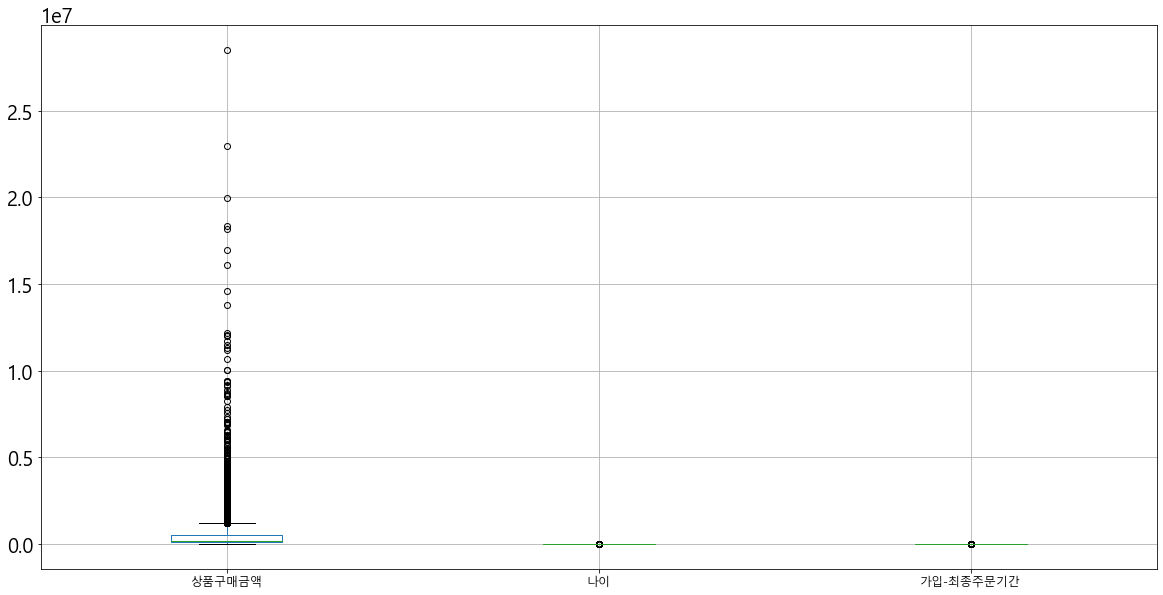

In [146]:
df_customer_merge.boxplot(figsize=(20,10)) 

# =============================================

# y=상품구매금액, x=각 컬럼 별 barplot

In [179]:
# 성별에 따른 상품구매금액 sum 피봇테이블 만들기

df_customer_s_sum = pd.pivot_table(data=df_customer_merge, index=('성별'),values=['상품구매금액'],aggfunc='sum').reset_index()
df_customer_s_sum

,성별,상품구매금액
0,남자,2309451690
1,여자,656341455


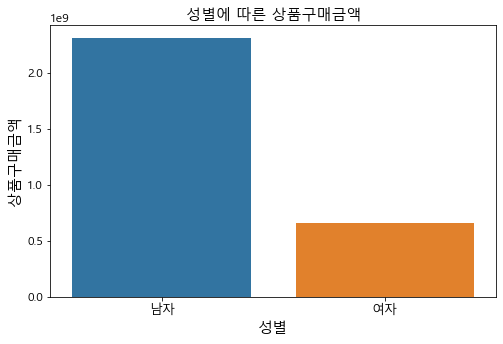

In [181]:
# x = 성별(전체 상품구매금액)

plt.figure(figsize=[8,5])
plt.title("성별에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=12)
sns.barplot(data=df_customer_s_sum, y='상품구매금액', x='성별')

In [182]:
# 사업자구분에 따른 상품구매금액 sum 피봇테이블 만들기

df_customer_people_sum = pd.pivot_table(data=df_customer_merge, index=('사업자구분'),values=['상품구매금액'],aggfunc='sum').reset_index()
df_customer_people_sum

,사업자구분,상품구매금액
0,개인,1498183005
1,사업자,1467502340
2,외국인,107800


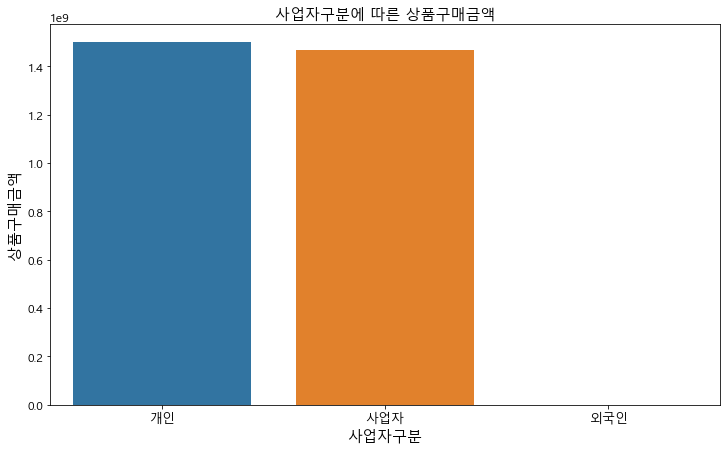

In [183]:
# x = 사업자구분(전체 상품구매금액)

plt.figure(figsize=[12,7])
plt.title("사업자구분에 따른 상품구매금액")
plt.rc('axes', labelsize=10)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
sns.barplot(data=df_customer_people_sum, y='상품구매금액', x='사업자구분')

In [184]:
# 유입경로에 따른 상품구매금액 sum 피봇테이블 만들기

df_customer_route_sum = pd.pivot_table(data=df_customer_merge, index=('유입경로'),values=['상품구매금액'],aggfunc='sum').reset_index()
df_customer_route_sum

,유입경로,상품구매금액
0,SNS광고,359172920
1,기타,168718980
2,블로그광고,248622475
3,신문광고,51704710
4,유튜브광고,298590070
5,이메일광고,330440600
6,인터넷검색,190410435
7,인터넷기사광고,310781560
8,잡지광고,282760290
9,전단지광고,302196190


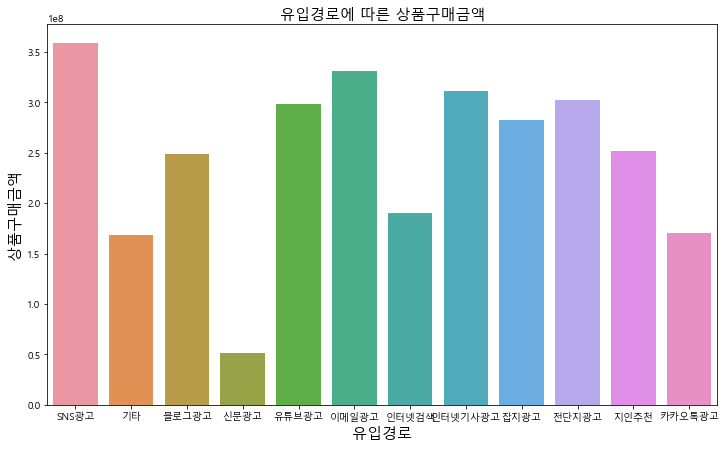

In [193]:
# x = 유입경로(전체 상품구매금액)

plt.figure(figsize=[12,7])
plt.title("유입경로에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
sns.barplot(data=df_customer_route_sum, y='상품구매금액', x='유입경로')

In [194]:
# 유입기기에 따른 상품구매금액 sum 피봇테이블 만들기

df_customer_device_sum = pd.pivot_table(data=df_customer_merge, index=('유입기기'),values=['상품구매금액'],aggfunc='sum').reset_index()
df_customer_device_sum

,유입기기,상품구매금액
0,PC,1878974500
1,모바일,1086818645


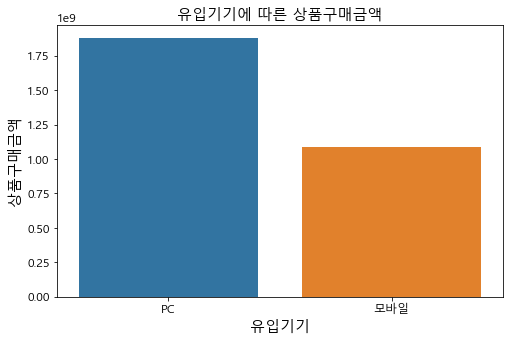

In [196]:
# x = 유입기기(전체 상품구매금액)

plt.figure(figsize=[8,5])
plt.title("유입기기에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

sns.barplot(data=df_customer_device_sum, y='상품구매금액', x='유입기기')

In [197]:
# AgeGroup에 따른 상품구매금액 sum 피봇테이블 만들기

df_customer_ag_sum = pd.pivot_table(data=df_customer_merge, index=('AgeGroup'),values=['상품구매금액'],aggfunc='sum').reset_index()
df_customer_ag_sum

,AgeGroup,상품구매금액
0,20-24,193840080
1,25-29,320922725
2,30-34,366965045
3,35-39,269024170
4,40-44,1249301470
5,45-49,332482435
6,50-54,81689745
7,55-59,55558545
8,60-64,20356380
9,65-69,21678030


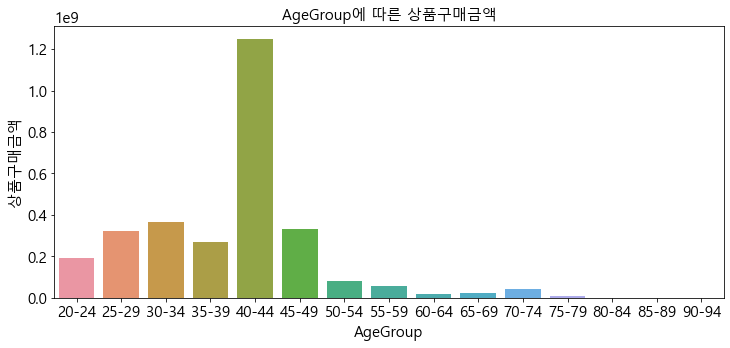

In [198]:
# x = AgeGroup(전체 상품구매금액)

plt.figure(figsize=[12,5])
plt.title("AgeGroup에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=12)

# AgeGroup 오름차순으로 정렬
age_group_sum=df_customer_ag_sum.sort_values(by=['AgeGroup'])

sns.barplot(data=age_group_sum, y='상품구매금액', x='AgeGroup')

# ==============================================

# 평균구매금액

In [199]:
# 성별에 따른 상품구매금액 mean 피봇테이블 만들기

df_customer_s_avg = pd.pivot_table(data=df_customer_merge, index=('성별'),values=['상품구매금액'],aggfunc='mean').reset_index()
df_customer_s_avg

,성별,상품구매금액
0,남자,507237.36
1,여자,1803135.87


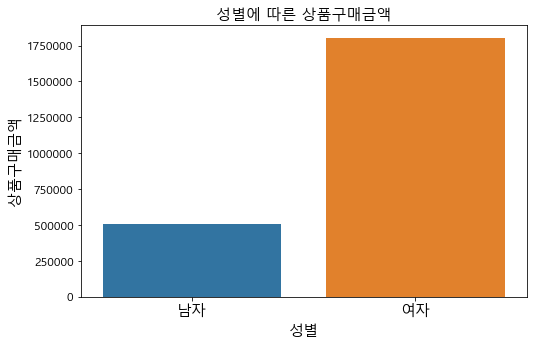

In [200]:
# x = 성별(평균구매금액)

plt.figure(figsize=[8,5])
plt.title("성별에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=12)
sns.barplot(data=df_customer_s_avg, y='상품구매금액', x='성별')

In [201]:
# 사업자구분에 따른 상품구매금액 mean 피봇테이블 만들기

df_customer_people_avg = pd.pivot_table(data=df_customer_merge, index=('사업자구분'),values=['상품구매금액'],aggfunc='mean').reset_index()
df_customer_people_avg

,사업자구분,상품구매금액
0,개인,485792.15
1,사업자,801038.40
2,외국인,107800.00


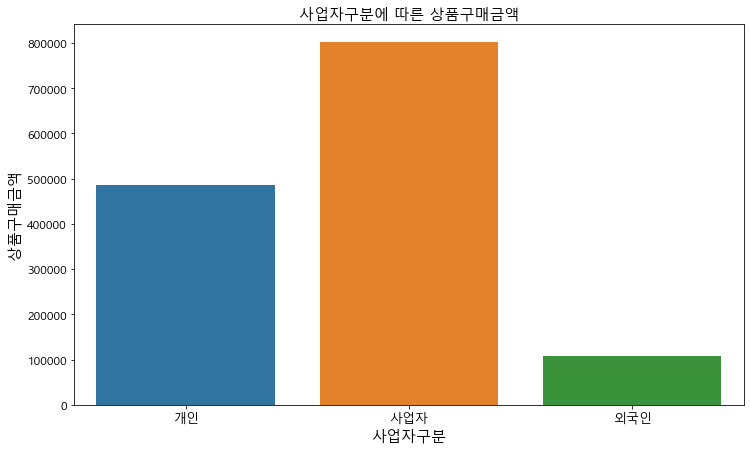

In [202]:
# x = 사업자구분(평균구매금액)

plt.figure(figsize=[12,7])
plt.title("사업자구분에 따른 상품구매금액")
plt.rc('axes', labelsize=10)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
sns.barplot(data=df_customer_people_avg, y='상품구매금액', x='사업자구분')

In [203]:
# 유입경로에 따른 상품구매금액 mean 피봇테이블 만들기

df_customer_route_avg = pd.pivot_table(data=df_customer_merge, index=('유입경로'),values=['상품구매금액'],aggfunc='mean').reset_index()
df_customer_route_avg

,유입경로,상품구매금액
0,SNS광고,480820.51
1,기타,887994.63
2,블로그광고,378420.81
3,신문광고,1261090.49
4,유튜브광고,339692.91
5,이메일광고,572687.35
6,인터넷검색,614227.21
7,인터넷기사광고,2085782.28
8,잡지광고,841548.48
9,전단지광고,528315.02


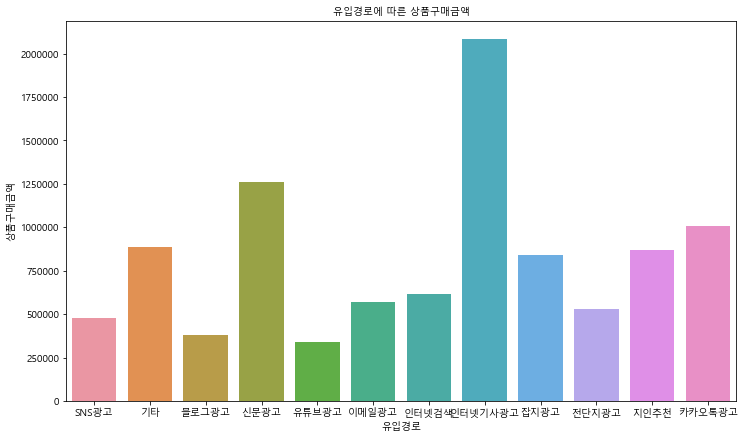

In [208]:
# x = 유입경로(평균구매금액)

plt.figure(figsize=[12,7])
plt.title("유입경로에 따른 상품구매금액")
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.barplot(data=df_customer_route_avg, y='상품구매금액', x='유입경로')

In [209]:
# 유입기기에 따른 상품구매금액 mean 피봇테이블 만들기

df_customer_device_avg = pd.pivot_table(data=df_customer_merge, index=('유입기기'),values=['상품구매금액'],aggfunc='mean').reset_index()
df_customer_device_avg

,유입기기,상품구매금액
0,PC,632651.35
1,모바일,558201.67


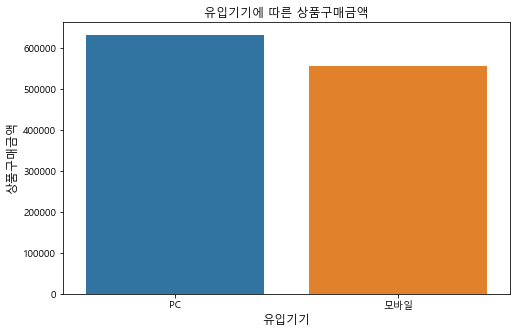

In [210]:
# x = 유입기기(평균구매금액)

plt.figure(figsize=[8,5])
plt.title("유입기기에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

sns.barplot(data=df_customer_device_avg, y='상품구매금액', x='유입기기')

In [211]:
# AgeGroup에 따른 상품구매금액 mean 피봇테이블 만들기

df_customer_ag_avg = pd.pivot_table(data=df_customer_merge, index=('AgeGroup'),values=['상품구매금액'],aggfunc='mean').reset_index()
df_customer_ag_avg

,AgeGroup,상품구매금액
0,20-24,1101364.09
1,25-29,708438.69
2,30-34,336048.58
3,35-39,777526.50
4,40-44,1046316.14
5,45-49,226332.49
6,50-54,928292.56
7,55-59,1424578.08
8,60-64,969351.43
9,65-69,1806502.50


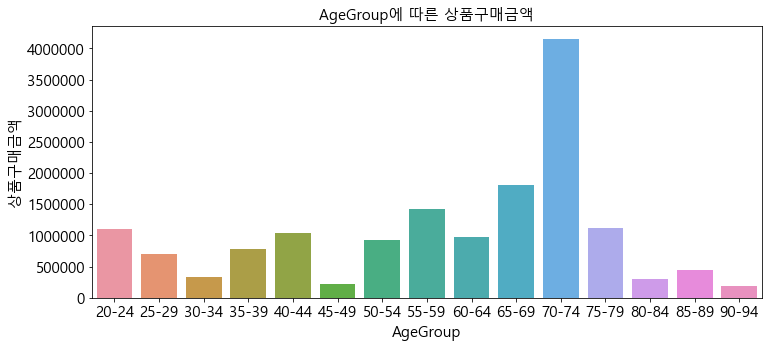

In [212]:
# x = AgeGroup(평균구매금액)

plt.figure(figsize=[12,5])
plt.title("AgeGroup에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=12)

# AgeGroup 오름차순으로 정렬
age_group_avg=df_customer_ag_avg.sort_values(by=['AgeGroup'])

sns.barplot(data=age_group_avg, y='상품구매금액', x='AgeGroup')

# =============================================

# 가입 후 바로 구매한 고객들의 정보로 시각화 

In [155]:
df_customer_merge2 = df_customer_merge[df_customer_merge['가입-최종주문기간'] == 0]
df_customer_merge2

,주문자ID,상품구매금액,나이,성별,유입경로,유입기기,사업자구분,회원구분,가입-최종주문기간,AgeGroup,region
0,100304734@n,103300,47,남자,SNS광고,모바일,개인,일반,0,45-49,오프라인
3,1004498382@k,76400,47,남자,SNS광고,모바일,개인,일반,0,45-49,경기도
4,1004547839@k,360800,47,남자,블로그광고,PC,개인,일반,0,45-49,전라남도
6,10055065@n,200480,48,남자,블로그광고,모바일,개인,일반,0,45-49,대구광역시
7,1005540326292754@f,60540,47,남자,SNS광고,모바일,개인,일반,0,45-49,대구광역시
...,...,...,...,...,...,...,...,...,...,...,...
4905,zibbab,103300,47,남자,전단지광고,모바일,사업자,일반,0,45-49,부산광역시
4906,ziral29,240660,46,남자,지인추천,모바일,사업자,사업자,0,45-49,경상북도
4907,zlbearlz,138910,48,남자,블로그광고,모바일,개인,일반,0,45-49,인천광역시
4912,zxvnm07,94380,45,남자,전단지광고,모바일,사업자,사업자,0,45-49,충청남도


회원가입 후 당일 구매 고객


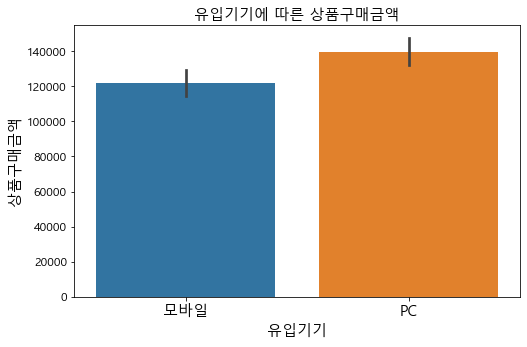

In [156]:
# x = 유입기기 (평균구매금액)

plt.figure(figsize=[8,5])
plt.title("유입기기에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=12)

print("회원가입 후 당일 구매 고객")
sns.barplot(data=df_customer_merge2, y='상품구매금액', x='유입기기')

회원가입 후 당일 구매 고객


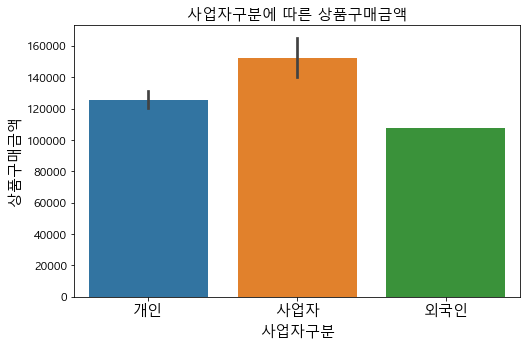

In [166]:
# x = 사업자구분 (평균구매금액)

plt.figure(figsize=[8,5])
plt.title("사업자구분에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

print("회원가입 후 당일 구매 고객")
sns.barplot(data=df_customer_merge2, y='상품구매금액', x='사업자구분')

회원가입 후 당일 구매 고객


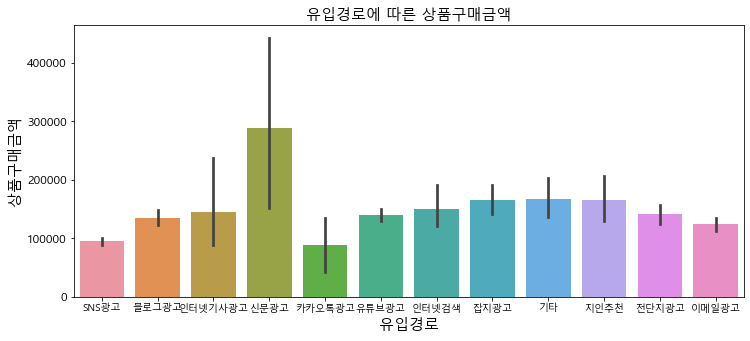

In [169]:
# x = 유입경로 (평균구매금액)

plt.figure(figsize=[12,5])
plt.title("유입경로에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=12)

print("회원가입 후 당일 구매 고객")
sns.barplot(data=df_customer_merge2, y='상품구매금액', x='유입경로')

회원가입 후 당일 구매 고객


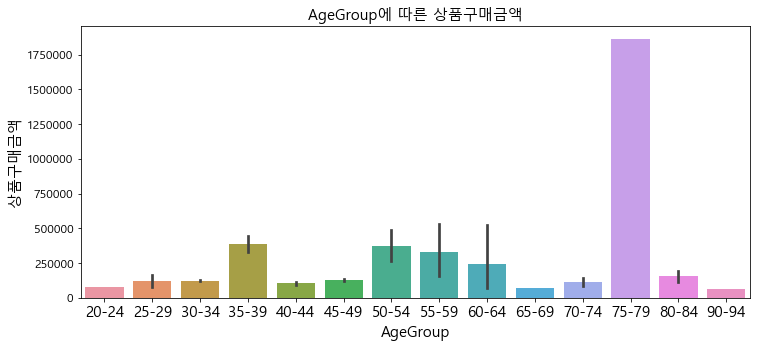

In [171]:
# x = AgeGroup (평균구매금액)

plt.figure(figsize=[12,5])
plt.title("AgeGroup에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=12)

# AgeGroup 오름차순으로 정렬
age_group2=df_customer_merge2.sort_values(by=['AgeGroup'])

print("회원가입 후 당일 구매 고객")
sns.barplot(data=age_group2, y='상품구매금액', x='AgeGroup')

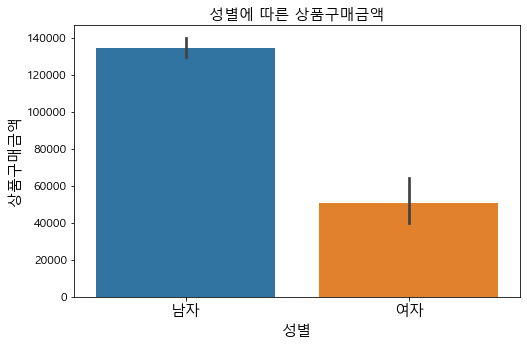

In [172]:
# x = 성별 (평균구매금액)

plt.figure(figsize=[8,5])
plt.title("성별에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=12)
sns.barplot(data=df_customer_merge2, y='상품구매금액', x='성별')

신규고객 중 회원가입 후 당일 구매한 고객의 특성은
75-79 나이대의 고객 중 신문광고를 통해 웹으로 접속한 남자 사업자인 경우가 평균구매금액이 높았다.

# ============================================

# #

In [78]:
# order_preprocess_sheet 데이터 불러오기

df_order_pre = pd.read_csv("order_preprocess_sheet.csv", engine='python', encoding="utf-8")
df_order_pre.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,...,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,주문년월
0,0,0,0,무통장입금,44550,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,...,전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,1812
1,1,1,1,무통장입금,44000,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,...,일반,모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,1812
2,2,2,2,무통장입금,6820,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,...,비회원,모바일웹,20181230-0000100,2018-12-30 오후 3:15,unsinged_0,기타,0,13910,42998,1812
3,3,3,3,무통장입금,49500,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,...,일반,모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,1812
4,4,4,4,무통장입금,61600,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,...,사업자,모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710,43066,1812


In [81]:
df_order_pre.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', '결제수단', '공급원가', '교환구분',
       '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액',
       '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '주문년월'],
      dtype='object')

In [85]:
# 주문년월에 따른 주문경로 이용추이를 보기위해 새로운 피봇테이블 만들기

df_order_pre_route = pd.pivot_table(data=df_order_pre, index=('주문년월','주문경로'),values=['결제수단'],aggfunc='count').reset_index()
df_order_pre_route

,주문년월,주문경로,결제수단
0,1701,PC쇼핑몰,3
1,1701,모바일웹,1
2,1702,PC쇼핑몰,14
3,1702,네이버 페이,5
4,1702,모바일웹,7
...,...,...,...
83,1905,PC쇼핑몰,1819
84,1905,네이버 페이,89
85,1905,모바일웹,1688
86,1906,네이버 페이,1


In [87]:
# "결제수단" 열 이름을 "이용빈도"로 바꿈(barplot 그리기 위한 테이블)

df_order_pre_route.rename(columns = {"결제수단": "이용빈도"}, inplace = True)
df_order_pre_route

,주문년월,주문경로,이용빈도
0,1701,PC쇼핑몰,3
1,1701,모바일웹,1
2,1702,PC쇼핑몰,14
3,1702,네이버 페이,5
4,1702,모바일웹,7
...,...,...,...
83,1905,PC쇼핑몰,1819
84,1905,네이버 페이,89
85,1905,모바일웹,1688
86,1906,네이버 페이,1


In [118]:
# 주문년월에 따른 고객들의 주문 횟수(pointplot 그리기 위한 테이블)

df_order_pre_route2 = df_order_pre_route.drop('주문경로',axis=1)
df_order_pre_route2 = pd.pivot_table(data=df_order_pre_route2, index=('주문년월'),values=['이용빈도'],aggfunc='sum').reset_index()
df_order_pre_route2

,주문년월,이용빈도
0,1701,4
1,1702,26
2,1703,42
3,1704,48
4,1705,85
5,1706,126
6,1707,172
7,1708,155
8,1709,167
9,1710,155


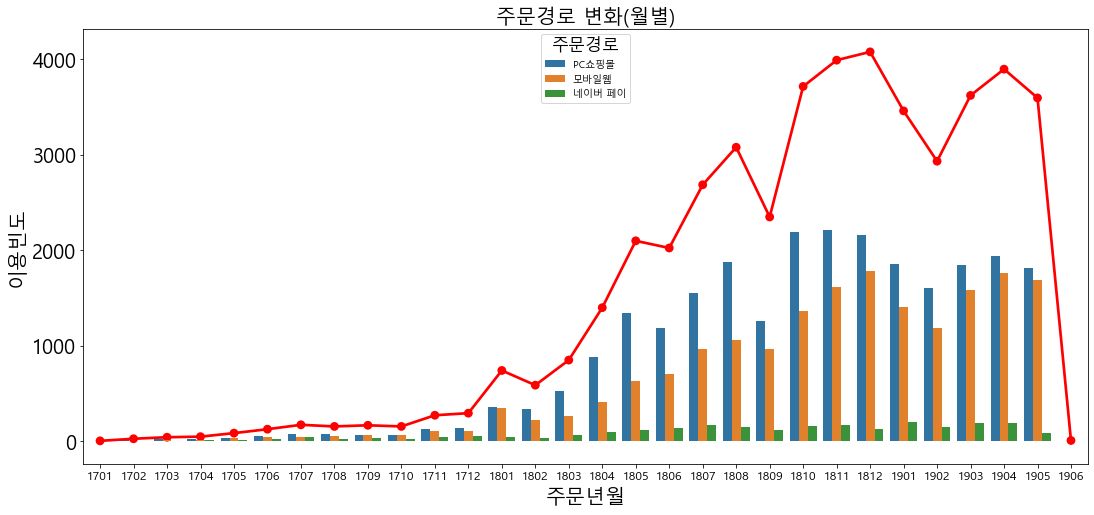

In [120]:
# 월별 총 주문횟수와(pointplot) 주문경로 추이(barplot)

plt.figure(figsize=[18,8])
plt.title("주문경로 변화(월별)")
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=20)

ax = sns.barplot(x="주문년월", y="이용빈도", hue="주문경로", data=df_order_pre_route)
sns.pointplot(data=df_order_pre_route2, x='주문년월', y='이용빈도',color='r')

PC를 이용한 주문량이 현재까지 모바일 이용 횟수보다 많지만, 시간이 흐를수록 모바일을 통한 주문횟수가 증가하고
있는 것을 알 수 있음. 앞으로 마케팅 진행시 모바일을 이용한 마케팅이 효과적일 것 같음.